In [189]:
from sklearn.neural_network import MLPRegressor
import numpy as np
from sklearn.metrics import make_scorer

In [224]:


def fit(error_threshold, n):
    err = 1e20
    x = np.linspace(0, 2, n)
    x = x.reshape(-1, 1)
    
    p = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(1), random_state=1, activation='logistic')
    y0 = np.random.rand(n)
    p.fit(x, y0)

    while np.fabs(err) > error_threshold:
        y_star = generate_derivative(x, p, 1e-6)
        print(y_star)
        print(p.coefs_)
        return 0
        p.fit(x, y_star)
        err = np.linalg.norm(y_star - p.predict(x))
        print(err)
    
    return p
    
def generate_derivative(x, p, delta) -> np.array:
    print(x)
    print(x + delta)
    print(p.predict(x))
    print(p.predict(x + 1e-6))
    grad = (p.predict(x) - p.predict(x + delta))/ delta
    return grad

In [225]:
error_threshold = 4e-4
p = fit(error_threshold, 20)

[[0.        ]
 [0.10526316]
 [0.21052632]
 [0.31578947]
 [0.42105263]
 [0.52631579]
 [0.63157895]
 [0.73684211]
 [0.84210526]
 [0.94736842]
 [1.05263158]
 [1.15789474]
 [1.26315789]
 [1.36842105]
 [1.47368421]
 [1.57894737]
 [1.68421053]
 [1.78947368]
 [1.89473684]
 [2.        ]]
[[1.00000000e-06]
 [1.05264158e-01]
 [2.10527316e-01]
 [3.15790474e-01]
 [4.21053632e-01]
 [5.26316789e-01]
 [6.31579947e-01]
 [7.36843105e-01]
 [8.42106263e-01]
 [9.47369421e-01]
 [1.05263258e+00]
 [1.15789574e+00]
 [1.26315889e+00]
 [1.36842205e+00]
 [1.47368521e+00]
 [1.57894837e+00]
 [1.68421153e+00]
 [1.78947468e+00]
 [1.89473784e+00]
 [2.00000100e+00]]
[0.00262816 0.5433275  0.62962021 0.6426803  0.64464073 0.64493465
 0.6449787  0.64498531 0.6449863  0.64498644 0.64498647 0.64498647
 0.64498647 0.64498647 0.64498647 0.64498647 0.64498647 0.64498647
 0.64498647 0.64498647]
[0.00263902 0.54332931 0.62962048 0.64268035 0.64464074 0.64493465
 0.6449787  0.64498531 0.6449863  0.64498644 0.64498647 0.64498647

In [218]:
x = np.linspace(0, 2, 20)
x = x.reshape(-1, 1)
print(p.predict(x))
print(x.reshape(20) * p.predict(x))

[-0.00072089 -0.00070902 -0.00069716 -0.00068529 -0.00067343 -0.00066156
 -0.00064969 -0.00063783 -0.00062596 -0.0006141  -0.00060223 -0.00059036
 -0.0005785  -0.00056663 -0.00055476 -0.00054289 -0.00053103 -0.00051916
 -0.00050729 -0.00049542]
[-0.00000000e+00 -7.46338553e-05 -1.46769778e-04 -2.16407713e-04
 -2.83547606e-04 -3.48189403e-04 -4.10333047e-04 -4.69978485e-04
 -5.27125663e-04 -5.81774524e-04 -6.33925016e-04 -6.83577082e-04
 -7.30730670e-04 -7.75385723e-04 -8.17542189e-04 -8.57200011e-04
 -8.94359137e-04 -9.29019511e-04 -9.61181079e-04 -9.90843787e-04]


In [226]:
180.17778 * np.exp(18.03 * x) / (np.exp(18.03 * x) + 1)**2

array([[4.50444450e+01],
       [2.04243425e+01],
       [3.87180761e+00],
       [6.02623173e-01],
       [9.08410476e-02],
       [1.36272892e-02],
       [2.04277303e-03],
       [3.06184552e-04],
       [4.58922466e-05],
       [6.87850877e-06],
       [1.03097732e-06],
       [1.54526833e-07],
       [2.31610740e-08],
       [3.47147053e-09],
       [5.20317306e-10],
       [7.79871519e-11],
       [1.16890132e-11],
       [1.75199409e-12],
       [2.62595588e-13],
       [3.93588331e-14]])

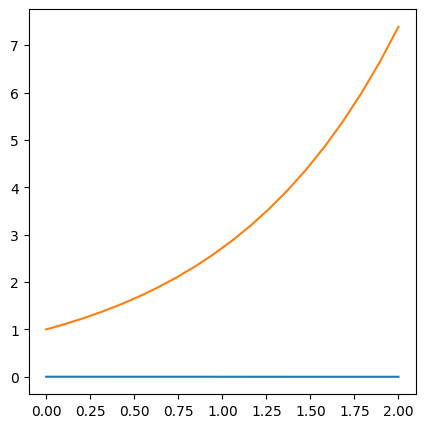

In [223]:
from matplotlib import pyplot as plt

plt.figure(figsize=(5, 5))

plt.plot(x, x.reshape(20) * p.predict(x))
plt.plot(x, np.exp(x))
plt.show()